In [1]:
import numpy as np
import os
# cdf
import seaborn as sns
os.chdir('/home/jp4474/latent-abc-smc')
from matplotlib import pyplot as plt


In [2]:
train_data = np.load('data/train_data.npz')

In [3]:
train_data['simulations'].shape

(36614, 30, 4)

In [4]:
train_data['simulations'][:,0,0].mean()

2336439.8645726745

In [5]:
def plot_simulation(data: dict, channels: int, channel_names: list, rows: int = 1):
    """
    Plots simulation data in a grid of subplots.

    Parameters:
        data (dict): Dictionary containing simulation data.
        channels (int): Number of channels to plot.
        channel_names (list): List of channel names.
        rows (int): Number of rows in the grid.
    """
    simulation = data['simulations']
    idx = np.random.randint(0, simulation.shape[0], size=rows)

    # Create figure with specified size
    fig, axs = plt.subplots(rows, channels, figsize=(channels * 5, rows * 5))

    # Ensure axs is always a 2D array, even when rows == 1
    if rows == 1:
        axs = np.array([axs])

    # Plot each channel
    for i, sim_idx in enumerate(idx):
        for j in range(channels):
            ax = axs[i, j]  # Access the subplot correctly
            ax.plot(simulation[sim_idx, :, j])
            ax.set_title(channel_names[j])
            ax.grid(True)
            ax.set_xlabel('Time Steps')
            ax.set_ylabel('Amplitude')

    # Adjust spacing between subplots
    plt.tight_layout()

    plt.show()
    plt.close()

def plot_parameters(data: dict, num_parameters: int, channel_names: list, rows: int = 1):
    """
    Plots parameter data in a grid of subplots.

    Parameters:
        num_parameters (int): Number of parameters to plot.
        channel_names (list): List of parameter names.
        rows (int): Number of rows in the grid.
    """
    parameters = data['params']

    # Create figure with specified size
    fig, axs = plt.subplots(1, 5, figsize=(5 * 5, 5))

    # Plot each parameter
    for i in range(num_parameters):
        ax = axs[i]
        sns.kdeplot(parameters[:, i], ax=ax)
        ax.set_title(channel_names[i])
        ax.grid(True)
        ax.set_xlabel('Parameter Values')
        ax.set_ylabel('Density')

    # overlay plots with normal distribution with mean and std
    #loc = [0.5, 14, 0.1, -5, 3.5, -4]
    #scale = [0.25, 2, 0.15, 1.2, 0.8, 1.2]

    

    # Adjust spacing between subplots
    plt.tight_layout()

    plt.show()
    plt.close()

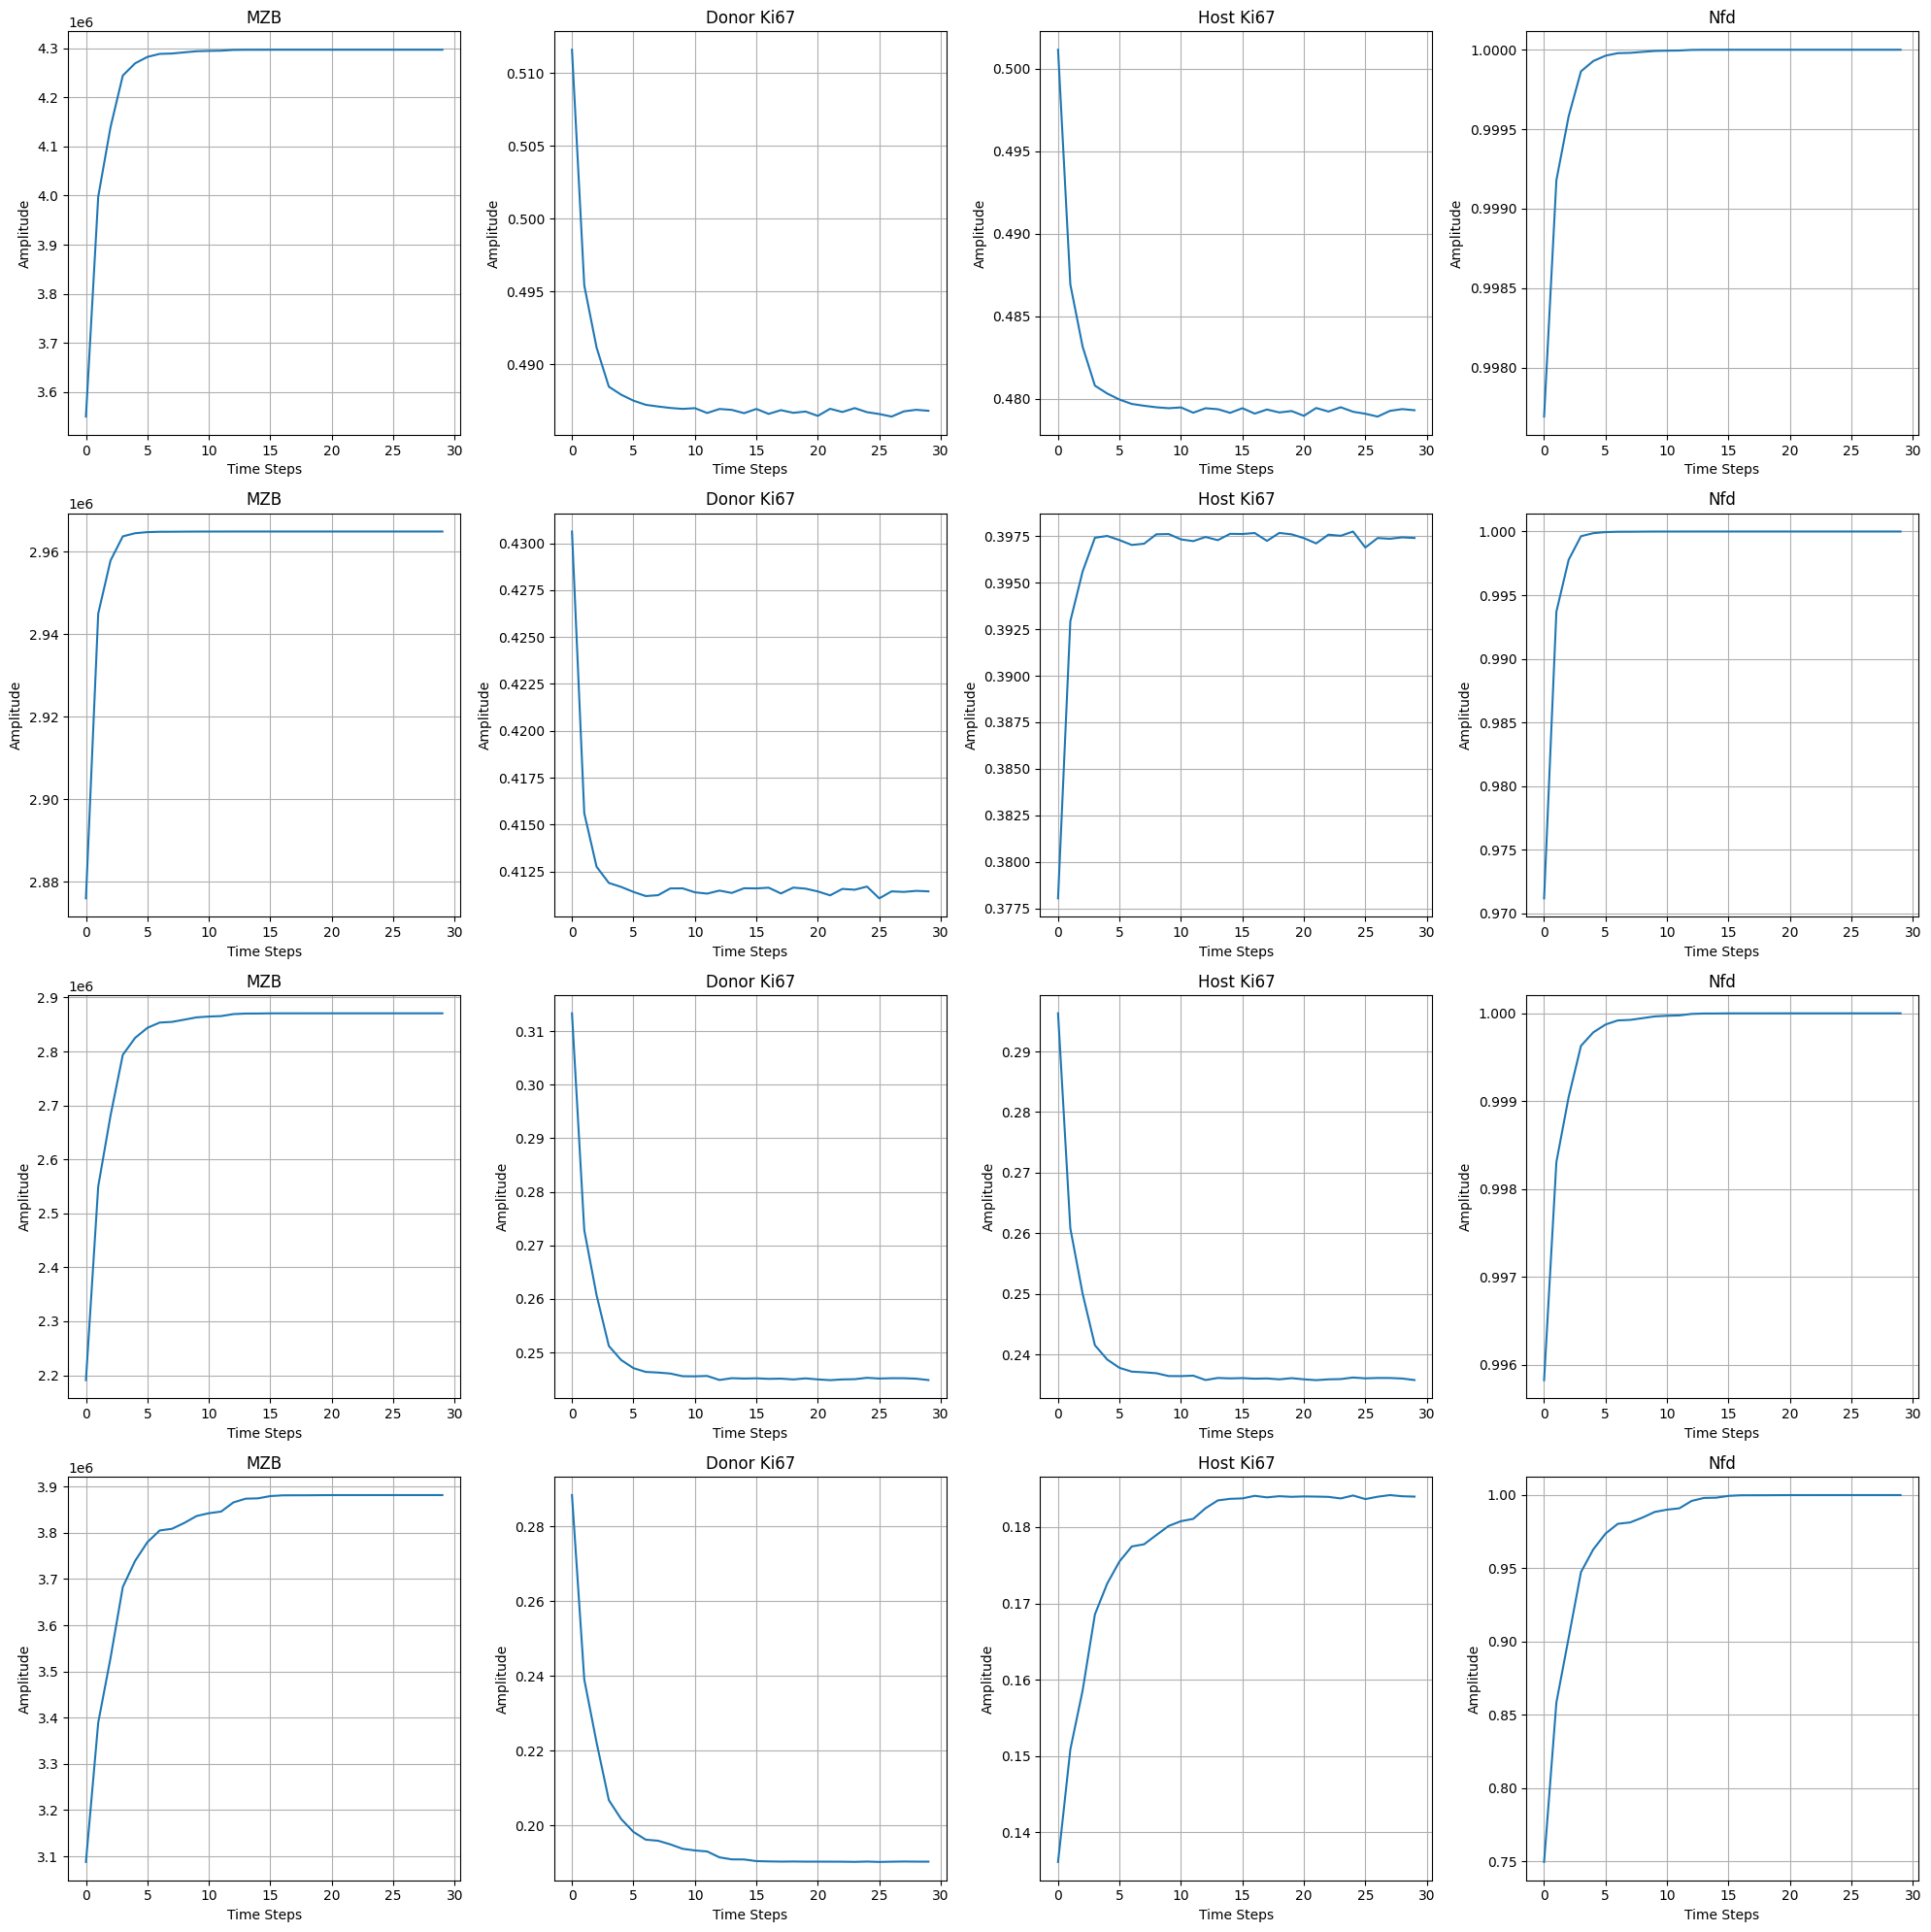

In [6]:
plot_simulation(train_data, 4, ['MZB', 'Donor Ki67', 'Host Ki67', 'Nfd'], rows = 4)

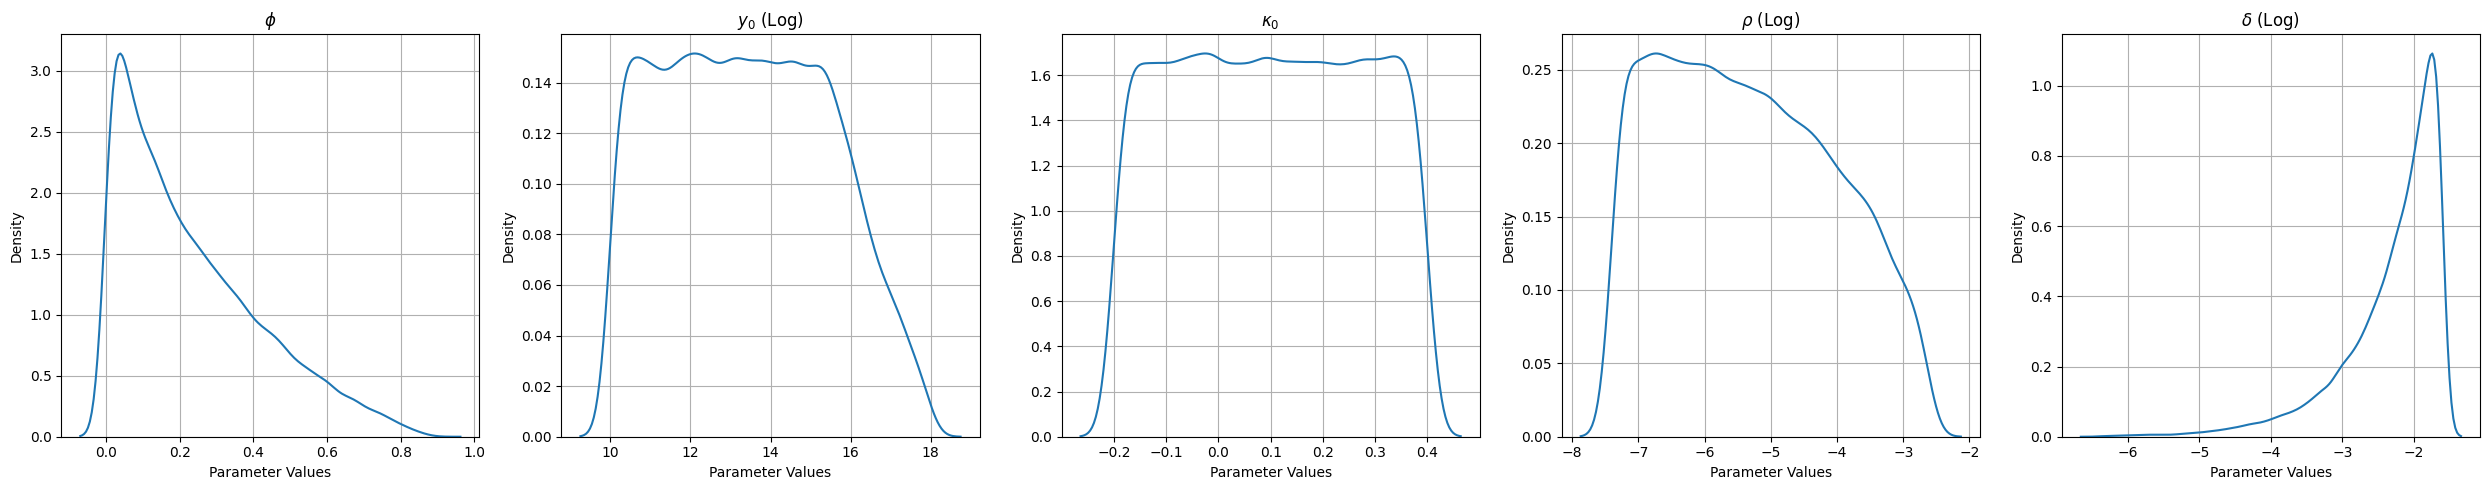

In [7]:
plot_parameters(train_data, 5, [
    r'$\phi$',
    r'$y_{0}$ (Log)',
    r'$\kappa_{0}$',
    r'$\rho$ (Log)', 
    #r'$\beta$',
    r'$\delta$ (Log)'
], rows = 4)

# Plot CDF of simulations

In [160]:
# Plot CDF of simulations
mzb, donor_ki67, host_ki67, nfd = train_data['simulations'].reshape(-1, 4).T

In [161]:
train_data['simulations'].shape

(36614, 30, 4)

In [162]:
#mzb_scaled = np.log(1e-8 + mzb) * 1/15
mzb_scaled = mzb/3e6
donor_ki67_scaled = (donor_ki67-np.median(donor_ki67))/np.std(donor_ki67)
host_ki67_scaled = (host_ki67-np.median(host_ki67))/np.std(host_ki67)
nfd = nfd

In [163]:
np.mean(mzb), np.std(mzb)

(2374712.3950285576, 1403461.669485874)

In [164]:
adjusted_simulations = np.column_stack((mzb_scaled, donor_ki67_scaled, host_ki67_scaled, nfd))

In [165]:
adjusted_simulations.shape

(1098420, 4)

In [166]:
mzb, donor_ki67, host_ki67, nfd = adjusted_simulations.reshape(-1, 4).T

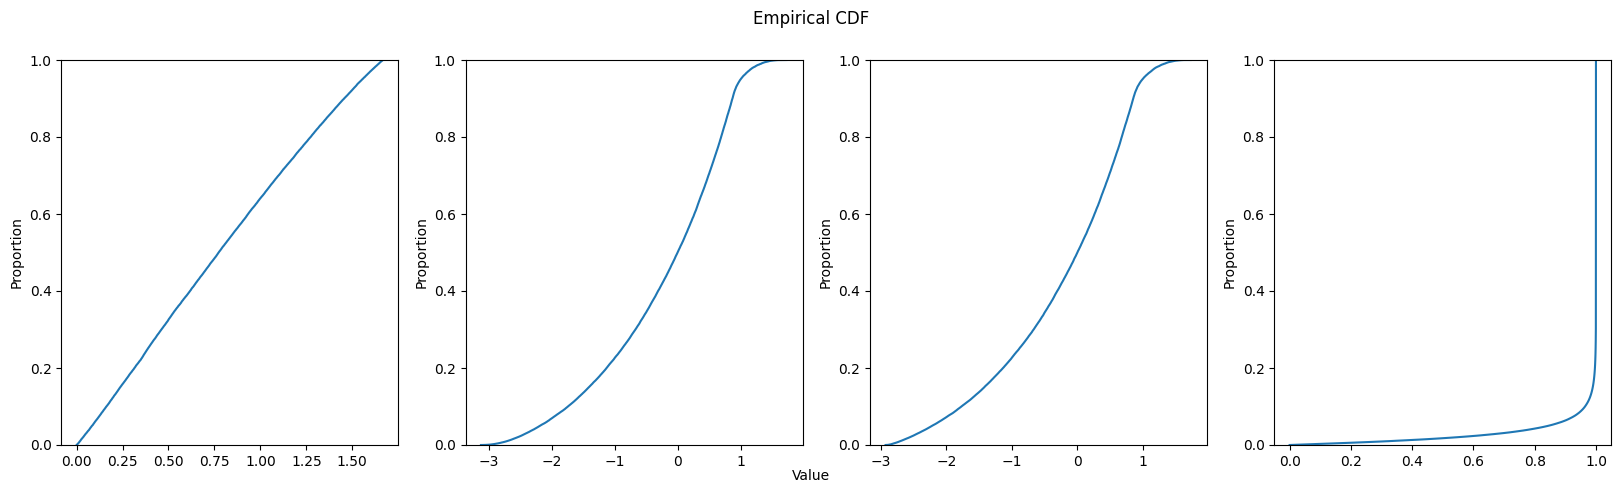

In [167]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

sns.ecdfplot(data=mzb, label='MZB', ax=ax[0])
sns.ecdfplot(data=donor_ki67, label='Donor Ki67', ax=ax[1])
sns.ecdfplot(data=host_ki67, label='Host Ki67', ax=ax[2])
sns.ecdfplot(data=nfd, label='Nfd', ax=ax[3])

fig.suptitle('Empirical CDF')

# add common x-axis title
fig.text(0.5, 0.04, 'Value', ha='center')
fig.show()